In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import unzip, download_and_unzip, load_and_analyze_data

In [2]:
data_dir = os.path.join(os.getcwd(), 'datasets')


### Either download and unzip using kaggle api
# download_and_unzip('manjeetsingh/retaildataset', data_dir)

### OR unzip downloaded file
url = 'https://www.kaggle.com/datasets/manjeetsingh/retaildataset/download'
zipfile = 'archive.zip'
unzip(os.path.join(data_dir,zipfile))

In [3]:
sales_file = 'sales data-set.csv'
sales_df = pd.read_csv(os.path.join(data_dir, sales_file))
sales_df.sample(10)

Store  Dept        Date  Weekly_Sales  IsHoliday
364365     39    25  20/04/2012       9273.54      False
327820     34    65  03/02/2012      38837.87      False
169393     18    16  22/04/2011      19677.02      False
6031        1    46  13/07/2012      17813.17      False
393965     42    28  09/03/2012         79.77      False
350790     37    59  09/09/2011         66.07       True
347069     37     4  10/08/2012      17014.88      False
392072     42     9  02/04/2010        121.42      False
127853     13    97  20/01/2012      26833.68      False
154890     16    60  21/09/2012        135.00      False

In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [5]:
sales_df.describe()

Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000

In [6]:
sales_df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [7]:
features_file = 'Features data set.csv'
features_df = pd.read_csv(os.path.join(data_dir, features_file))
load_and_analyze_data(features_df)

      Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
2673     15  29/06/2012        68.91       3.667    3076.48     589.40   
430       3  13/05/2011        79.87       3.899        NaN        NaN   
6862     38  20/07/2012        85.53       3.726      75.04        NaN   
1419      8  16/11/2012        48.24       3.252   14137.45    3180.35   
7572     42  16/03/2012        62.11       4.273     438.48       1.50   
6830     38  09/12/2011        42.17       3.644      61.05        NaN   
807       5  12/08/2011        90.16       3.638        NaN        NaN   
1106      7  14/05/2010        41.41       2.788        NaN        NaN   
98        1  23/12/2011        47.96       3.112    2725.36      40.48   
6242     35  18/02/2011        39.32       3.245        NaN        NaN   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
2673        NaN    1770.01    2113.30  138.196267         8.150      False  
430         NaN        NaN     

In [8]:
stores_file = 'stores data-set.csv'
stores_df = pd.read_csv(os.path.join(data_dir, stores_file))
load_and_analyze_data(stores_df)

    Store Type    Size
25     26    A  152513
24     25    B  128107
11     12    B  112238
41     42    C   39690
7       8    A  155078
35     36    A   39910
14     15    B  123737
33     34    A  158114
43     44    C   39910
22     23    B  114533
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None
           Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000
Store    0
Type     0
Size     0
dtype: int64


----------------------------

- Markdowns, CPI and Unemployment have null values
- The csv's are connected via 'StoreId', so we can merge it into one dataframe: 

In [9]:
assert stores_df['Store'].value_counts().sum() == stores_df.shape[0]

In [10]:
# print(features_df['Store'].value_counts()) 
print(features_df['Store'].value_counts().unique())
print(len(features_df['Store'].value_counts()))
print(features_df.shape)

[182]
45
(8190, 12)


The features dataframe contains 182 datapoints for each store, meaning that it can be merged by the 'Store' column into a (8190,14 - initial columns plus 'type' and 'size')) sized dataframe

In [11]:
joined_df = features_df.merge(stores_df, on = 'Store')
joined_df.shape

(8190, 14)

In [12]:
load_and_analyze_data(joined_df)

      Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
2723     15  14/06/2013        61.31       3.795    3433.45     553.69   
6355     35  19/04/2013        53.65       3.676    1975.51     532.62   
3501     20  03/12/2010        35.47       3.046        NaN        NaN   
2662     15  13/04/2012        43.52       4.187    3408.63    3269.14   
817       5  21/10/2011        66.90       3.353        NaN        NaN   
3229     18  07/09/2012        71.85       3.921    5817.03       3.00   
680       4  31/08/2012        76.47       3.646   19617.58       1.02   
7984     44  15/02/2013        27.12       3.323     625.08     518.39   
6029     34  16/07/2010        78.53       2.621        NaN        NaN   
4614     26  29/04/2011        47.17       3.988        NaN        NaN   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  \
2723     360.00    1766.04    1101.76         NaN           NaN      False   
6355      48.00     173.10   

In [13]:
print(sales_df['Store'].value_counts().unique())
print(len(sales_df['Store'].value_counts()))
print(sales_df.shape)

[10474 10315 10272 10244 10238 10228 10225 10224 10214 10211 10202 10148
 10142 10113 10088 10062 10050 10040 10017  9901  9895  9878  9864  9859
  9854  9804  9762  9705  9688  9637  9582  9528  9455  9443  9036  8999
  8867  7362  7206  7169  7156  6953  6751  6487  6222]
45
(421570, 5)


In [14]:
# print(sales_df.columns.to_list())
# print(joined_df.columns.to_list())
set(sales_df.columns.to_list()).intersection(set(joined_df.columns.to_list()))

{'Date', 'IsHoliday', 'Store'}

Seems like we can also use 'Date' and 'IsHoliday' columns to also join the tables

In [15]:
# raw_data['Mycol'] =  pd.to_datetime(raw_data['Mycol'], format='%d%b%Y:%H:%M:%S.%f')
# https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime

In [16]:
joined_df = pd.merge(joined_df, sales_df, on = ['Store', 'Date', 'IsHoliday'])

In [17]:
print(joined_df.shape)
joined_df.head(10)

(421570, 16)


Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  05/02/2010        42.31       2.572        NaN        NaN   
2      1  05/02/2010        42.31       2.572        NaN        NaN   
3      1  05/02/2010        42.31       2.572        NaN        NaN   
4      1  05/02/2010        42.31       2.572        NaN        NaN   
5      1  05/02/2010        42.31       2.572        NaN        NaN   
6      1  05/02/2010        42.31       2.572        NaN        NaN   
7      1  05/02/2010        42.31       2.572        NaN        NaN   
8      1  05/02/2010        42.31       2.572        NaN        NaN   
9      1  05/02/2010        42.31       2.572        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday Type  \
0        NaN        NaN        NaN  211.096358         8.106      False    A   
1        NaN        NaN        NaN  211.096358         8.106      False    A   
2        NaN        NaN        NaN  211.096358         8.106      False    A   
3        NaN        NaN        NaN  211.096358         8.106      False    A   
4        NaN        NaN        NaN  211.096358         8.106      False    A   
5        NaN        NaN        NaN  211.096358         8.106      False    A   
6        NaN        NaN        NaN  211.096358         8.106      False    A   
7        NaN        NaN        NaN  211.096358         8.106      False    A   
8        NaN        NaN        NaN  211.096358         8.106      False    A   
9        NaN        NaN        NaN  211.096358         8.106      False    A   

     Size  Dept  Weekly_Sales  
0  151315     1      24924.50  
1  151315     2      50605.27  
2  151315     3      13740.12  
3  151315     4      39954.04  
4  151315     5      32229.38  
5  151315     6       5749.03  
6  151315     7      21084.08  
7  151315     8      40129.01  
8  151315     9      16930.99  
9  151315    10      30721.50

In [18]:
load_and_analyze_data(joined_df)

        Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
30364       4  23/04/2010        56.87       2.805        NaN        NaN   
244354     25  10/02/2012        32.47       3.640   17655.40    5620.25   
298500     31  20/05/2011        68.36       3.907        NaN        NaN   
52870       6  11/03/2011        57.71       3.459        NaN        NaN   
94566      10  16/12/2011        50.53       3.489    2200.27     337.44   
283559     29  16/12/2011        39.11       3.445    1779.72        NaN   
79645       9  28/05/2010        77.12       2.759        NaN        NaN   
236620     24  14/09/2012        64.28       4.088    8179.55       1.00   
280490     29  28/01/2011        20.61       3.243        NaN        NaN   
328165     34  17/02/2012        37.25       3.493    8386.11    4644.97   

        MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  \
30364         NaN        NaN        NaN  126.471333         7.896      False   
244

In [19]:
# Converting the Date column to pd.datetime object and creating year and week values

joined_df['DateTime'] = pd.to_datetime(joined_df['Date'], format="%d/%m/%Y")
joined_df['Year'] = joined_df['DateTime'].dt.isocalendar().year
joined_df['Week'] = joined_df['DateTime'].dt.isocalendar().week
joined_df.sort_values(by='DateTime')

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0           1  05/02/2010        42.31       2.572        NaN        NaN   
330761     35  05/02/2010        27.19       2.784        NaN        NaN   
330762     35  05/02/2010        27.19       2.784        NaN        NaN   
330763     35  05/02/2010        27.19       2.784        NaN        NaN   
330764     35  05/02/2010        27.19       2.784        NaN        NaN   
...       ...         ...          ...         ...        ...        ...   
128051     13  26/10/2012        46.97       3.755   10192.49     364.57   
128052     13  26/10/2012        46.97       3.755   10192.49     364.57   
128053     13  26/10/2012        46.97       3.755   10192.49     364.57   
390991     41  26/10/2012        41.80       3.686    4864.30     101.34   
421569     45  26/10/2012        58.85       3.882    4018.91      58.08   

        MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  \
0             NaN        NaN        NaN  211.096358         8.106      False   
330761        NaN        NaN        NaN  135.352461         9.262      False   
330762        NaN        NaN        NaN  135.352461         9.262      False   
330763        NaN        NaN        NaN  135.352461         9.262      False   
330764        NaN        NaN        NaN  135.352461         9.262      False   
...           ...        ...        ...         ...           ...        ...   
128051      150.0    1714.15    5563.92  131.193097         5.621      False   
128052      150.0    1714.15    5563.92  131.193097         5.621      False   
128053      150.0    1714.15    5563.92  131.193097         5.621      False   
390991      250.6      47.24    1524.43  199.219532         6.195      False   
421569      100.0     211.94     858.33  192.308899         8.667      False   

       Type    Size  Dept  Weekly_Sales   DateTime  Year  Week  
0         A  151315     1      24924.50 2010-02-05  2010     5  
330761    B  103681     3      14612.19 2010-02-05  2010     5  
330762    B  103681     4      26323.15 2010-02-05  2010     5  
330763    B  103681     5      36414.63 2010-02-05  2010     5  
330764    B  103681     6      11437.81 2010-02-05  2010     5  
...     ...     ...   ...           ...        ...   ...   ...  
128051    A  219622    49       7770.71 2012-10-26  2012    43  
128052    A  219622    50       1486.00 2012-10-26  2012    43  
128053    A  219622    52       4738.93 2012-10-26  2012    43  
390991    A  196321     4      32699.78 2012-10-26  2012    43  
421569    B  118221    98       1076.80 2012-10-26  2012    43  

[421570 rows x 19 columns]

### Let's check the sales numbers by weeks and months

In [20]:
y_w = joined_df.groupby('DateTime')

In [21]:
df_temp = y_w.sum()['Weekly_Sales'].reset_index()
fig, ax = plt.subplots(figsize=(12,6))
ax.plot('DateTime', 'Weekly_Sales', data=df_temp)

Text(0, 0.5, 'Sales')

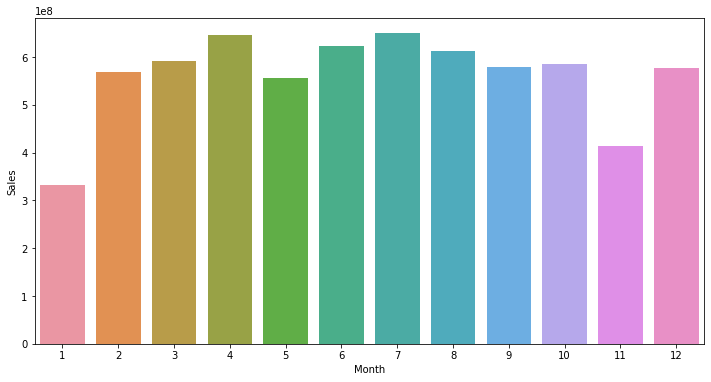

In [22]:
df_temp = joined_df.groupby(joined_df.DateTime.apply(lambda x: x.month))['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=df_temp.DateTime,y=df_temp.Weekly_Sales)
plt.xlabel("Month")
plt.ylabel("Sales")

- There seems to be a lack of data at the end of 2012 and at the beginning of 2010 - there should be again a peak during the holiday season

In [23]:
df_2012 = joined_df[(joined_df['Year'] == 2012) & (joined_df['Week'] > 40)].sort_values(by='Week', ascending=False)
df_2012.head(10)

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
421569     45  26/10/2012        58.85       3.882    4018.91      58.08   
128063     13  26/10/2012        46.97       3.755   10192.49     364.57   
128052     13  26/10/2012        46.97       3.755   10192.49     364.57   
128053     13  26/10/2012        46.97       3.755   10192.49     364.57   
128054     13  26/10/2012        46.97       3.755   10192.49     364.57   
128055     13  26/10/2012        46.97       3.755   10192.49     364.57   
128056     13  26/10/2012        46.97       3.755   10192.49     364.57   
128057     13  26/10/2012        46.97       3.755   10192.49     364.57   
128058     13  26/10/2012        46.97       3.755   10192.49     364.57   
128059     13  26/10/2012        46.97       3.755   10192.49     364.57   

        MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  \
421569      100.0     211.94     858.33  192.308899         8.667      False   
128063      150.0    1714.15    5563.92  131.193097         5.621      False   
128052      150.0    1714.15    5563.92  131.193097         5.621      False   
128053      150.0    1714.15    5563.92  131.193097         5.621      False   
128054      150.0    1714.15    5563.92  131.193097         5.621      False   
128055      150.0    1714.15    5563.92  131.193097         5.621      False   
128056      150.0    1714.15    5563.92  131.193097         5.621      False   
128057      150.0    1714.15    5563.92  131.193097         5.621      False   
128058      150.0    1714.15    5563.92  131.193097         5.621      False   
128059      150.0    1714.15    5563.92  131.193097         5.621      False   

       Type    Size  Dept  Weekly_Sales   DateTime  Year  Week  
421569    B  118221    98       1076.80 2012-10-26  2012    43  
128063    A  219622    74      26833.90 2012-10-26  2012    43  
128052    A  219622    50       1486.00 2012-10-26  2012    43  
128053    A  219622    52       4738.93 2012-10-26  2012    43  
128054    A  219622    54         16.88 2012-10-26  2012    43  
128055    A  219622    55      17414.45 2012-10-26  2012    43  
128056    A  219622    56       1572.62 2012-10-26  2012    43  
128057    A  219622    58      12805.00 2012-10-26  2012    43  
128058    A  219622    59        294.93 2012-10-26  2012    43  
128059    A  219622    60        756.00 2012-10-26  2012    43

In [24]:
### The month's average sales

df_month_avg = joined_df.groupby(joined_df.DateTime.apply(lambda x: x.month))['Weekly_Sales'].mean().reset_index()
# df_temp = joined_df.groupby(pd.PeriodIndex(joined_df.DateTime, freq="M"))['Weekly_Sales'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=df_month_avg.DateTime,y=df_month_avg.Weekly_Sales)
plt.title("Average sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

In [25]:
### SALES BY STORE TYPES 

ty = joined_df.groupby(['Year', 'Type'])['Weekly_Sales'].sum().reset_index()
ty['WeeklySales_scaled'] = ty['Weekly_Sales'] / 1000000

# transposing years https://stackoverflow.com/questions/52541982/pandas-transpose-one-column
ty = ty.pivot(index='Type', columns='Year', values='WeeklySales_scaled').reset_index()
ty["YearlyAvg"] = ty.mean(axis=1)


ty.plot(x="Type",y=[2010,2011,2012,"YearlyAvg"],kind="bar")
plt.ylabel("Sales in millions")


# The second option would be to scale it using minmax
# https://www.adamsmith.haus/python/answers/how-to-scale-pandas-dataframe-columns-with-the-scikit-learn-minmaxscaler-in-python

/tmp/ipykernel_145301/3763626050.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ty["YearlyAvg"] = ty.mean(axis=1)


Text(0, 0.5, 'Sales in millions')

In [26]:
# joined_df.plot(x="Size", y="Weekly_Sales", kind="bar")

# binned = pd.cut(joined_df[["Size", "Weekly_Sales"]], bins=[0, 0.2, 0.4, 0.6, 0.8, 1], include_lowest=True)
# ax = binned.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(12,6))
# ax.set_xticklabels([c[1:-1].replace(","," to") for c in binned.cat.categories])
# plt.show()

In [27]:
### Corelation of store size and total sales

joined_df['Size'].corr(joined_df['Weekly_Sales'])


0.2438279922630429

<AxesSubplot:xlabel='Store'>

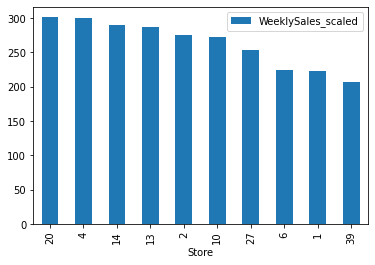

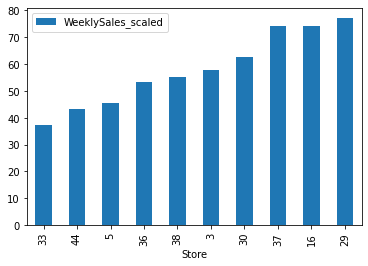

In [28]:
### SALES BY STORES

# top 10 store id's
df_temp = joined_df.groupby(['Store'])['Weekly_Sales'].sum().reset_index()
df_temp['WeeklySales_scaled'] = df_temp['Weekly_Sales'] / 1000000
top_10 = df_temp.sort_values(by="WeeklySales_scaled", ascending=False).head(10)
top_10.plot(x="Store", y="WeeklySales_scaled", kind="bar")


# lowest 10 store id's 
low_10 = df_temp.sort_values(by="WeeklySales_scaled").head(10)
low_10.plot(x="Store", y="WeeklySales_scaled", kind="bar")

In [39]:
print(joined_df.columns)

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Type', 'Size', 'Dept', 'Weekly_Sales', 'DateTime', 'Year',
       'Week'],
      dtype='object')


In [29]:
### RELATION OF SALES TO:
    # a) fuel price
    # b) CPI and unemployment
    # c) Temperature and Holidays 
# joined_df.plot(x="Rank", y="P75th")

# chart plot with 3 charts (y-axis) over the 3-year period in months (x-axis)

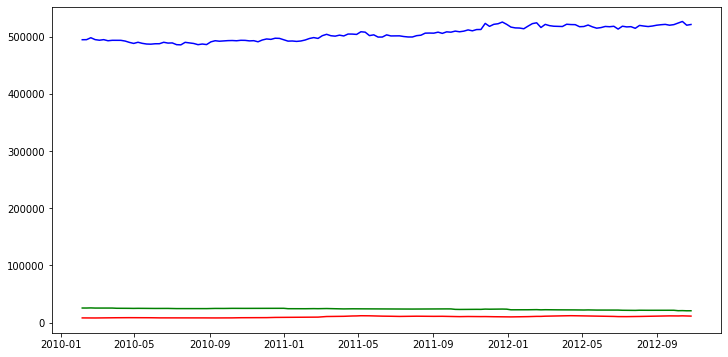

In [46]:
# print(y_w.head())

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
df_temp = min_max_scaler.fit_transform(df[[""]])


fig, ax = plt.subplots(figsize=(12,6))
# ax.plot('DateTime', 'Weekly_Sales', data=y_w.sum()['Weekly_Sales'].reset_index())
ax.plot('DateTime', 'Fuel_Price', data=y_w.sum()['Fuel_Price'].reset_index(), color="red")
ax.plot('DateTime', 'CPI', data=y_w.sum()['CPI'].reset_index(), color="blue")
ax.plot('DateTime', 'Unemployment', data=y_w.sum()['Unemployment'].reset_index(), color="green")

In [ ]:

# df_temp = y_w.sum()['Weekly_Sales'].reset_index()

# fig, ax = plt.subplots(figsize=(12,6))
# ax.plot('DateTime', 'Weekly_Sales', data=y_w.sum()['Weekly_Sales'].reset_index())

ws = joined_df.groupby('Weekly_Sales')
ws.plot(x="Weekly_Sales", y="Fuel_Price", figsize=(16,8))